In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import fft
from scipy.io import loadmat
from scipy.optimize import curve_fit

In [2]:
mat = loadmat("FID_checkoff1.mat")
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'psd', 'readout', 'time', 'readout_ave'])

/opt/homebrew/Caskroom/miniforge/base/envs/imaging/lib/python3.9/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


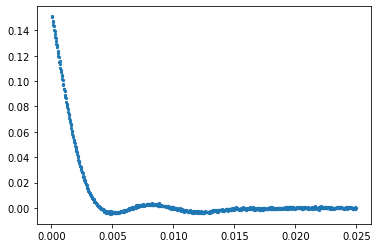

In [3]:
plt.scatter(mat["time"].reshape(-1), mat["readout"].reshape(-1), s=5)
plt.show()

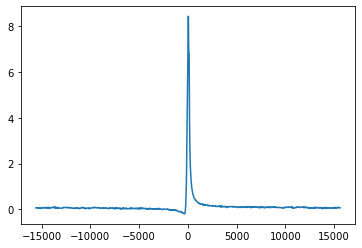

In [4]:
fs = 31.25e3

fft_time = fft.fftshift(fft.fftfreq(len(mat["readout"].reshape(-1)), d=1/fs))
readout_fft = fft.fftshift(fft.fft(mat["readout"].reshape(-1)))

plt.plot(fft_time, np.real(readout_fft))
plt.show()

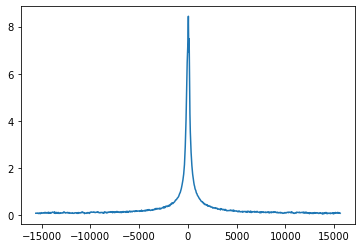

In [5]:
plt.plot(fft_time, np.abs(readout_fft))
plt.show()

In [6]:
abs_readout_fft = np.abs(readout_fft)

S = np.max(abs_readout_fft)
noise = np.std(abs_readout_fft[abs_readout_fft < 0.1])
print(f"SNR = {S / noise}")
print(f"Area of the spectrum = {np.sum(abs_readout_fft)}")

SNR = 656.7144995156233
Area of the spectrum = 247.04817034432034


In [7]:
def func(x, a, c):
    return a * np.exp(- x / c)

x = mat["time"].reshape(-1)
y = mat["readout"].reshape(-1)

popt, pcov = curve_fit(func, x, y, p0=(0.15, 1e-3))

/opt/homebrew/Caskroom/miniforge/base/envs/imaging/lib/python3.9/site-packages/numpy/lib/function_base.py:601: ComplexWarning: Casting complex values to real discards the imaginary part
  a = asarray(a, dtype=dtype, order=order)


/opt/homebrew/Caskroom/miniforge/base/envs/imaging/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


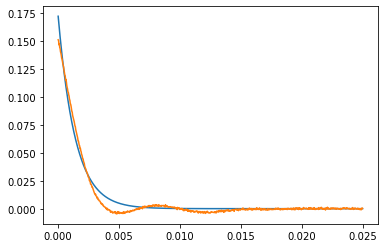

In [8]:
plt.plot(x, func(x, *popt))
plt.plot(x, y)

In [9]:
print(f"T2* = {popt[1]}")

T2* = 0.001399428403013105


In [24]:
1.4e-3

0.0014

## Averaging

In [10]:
files = [f"FID_checkoff2_avg{avg}.mat" for avg in [1, 2, 4, 16]]

In [11]:
def snr(matfile):
    mat = loadmat(matfile)
    x, y = mat["time"].reshape(-1), mat["readout_ave"].reshape(-1)
    
    fft_time = fft.fftshift(fft.fftfreq(len(y), d=1/fs))
    readout_fft = np.abs(fft.fftshift(fft.fft(y)))
    
    plt.plot(fft_time, readout_fft)
    plt.show()
    
    S = np.max(readout_fft)
    noise = np.std(readout_fft[:-100])
    
    return S / noise

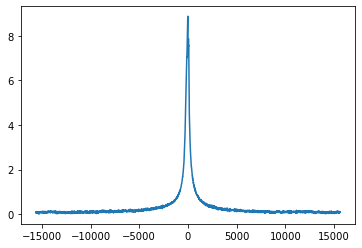

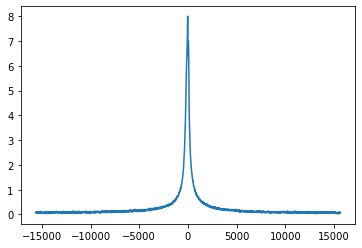

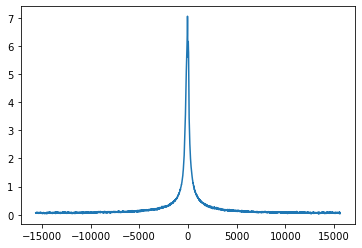

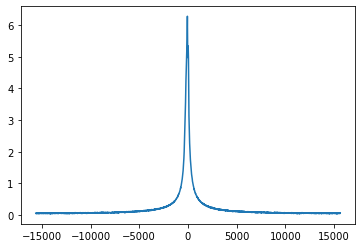

[10.332276388411058, 10.473448814128469, 10.52261182820872, 10.558835547497612]


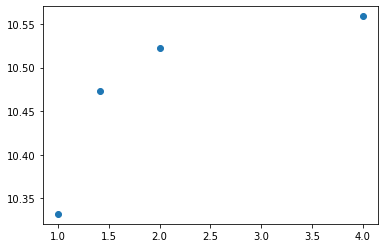

In [12]:
x = [1, 2, 4, 16]
x = [np.sqrt(i) for i in x]
y = [snr(matfile) for matfile in files]
print(y)
plt.scatter(x, y)

## Shimming

In [13]:
mat = loadmat("FID_best_shim.mat")
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'psd', 'readout', 'time', 'readout_ave'])

/opt/homebrew/Caskroom/miniforge/base/envs/imaging/lib/python3.9/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


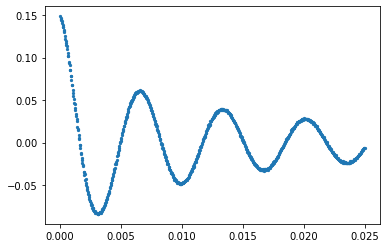

In [18]:
plt.scatter(mat["time"].reshape(-1), -mat["readout"].reshape(-1), s=5)
plt.show()

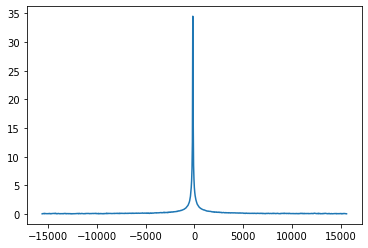

In [15]:
fs = 31.25e3

fft_time = fft.fftshift(fft.fftfreq(len(mat["readout"].reshape(-1)), d=1/fs))
readout_fft = fft.fftshift(fft.fft(mat["readout"].reshape(-1)))

plt.plot(fft_time, np.abs(readout_fft))
plt.show()

In [16]:
abs_readout_fft = np.abs(readout_fft)

S = np.max(abs_readout_fft)
noise = np.std(abs_readout_fft[abs_readout_fft < 0.1])
print(f"SNR = {S / noise}")
print(f"Area of the spectrum = {np.sum(abs_readout_fft)}")

SNR = 2368.736884644617
Area of the spectrum = 287.0634416093714


/opt/homebrew/Caskroom/miniforge/base/envs/imaging/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


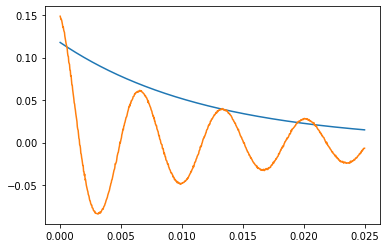

T2* = 0.012101683376528068


In [22]:
def func(x, a, c):
    return a * np.exp(- x / c)

x = mat["time"].reshape(-1)
y = mat["readout"].reshape(-1)

popt, pcov = curve_fit(func, x, np.abs(-y), p0=(0.15, 1e-3))
plt.plot(x, func(x, *popt))
plt.plot(x, -y)
plt.show()

print(f"T2* = {popt[1]}")

In [25]:
12e-3

0.012

## Small Ball

In [27]:
mat = loadmat("FID_smallBall.mat")
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'psd', 'readout', 'time', 'readout_ave'])

/opt/homebrew/Caskroom/miniforge/base/envs/imaging/lib/python3.9/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


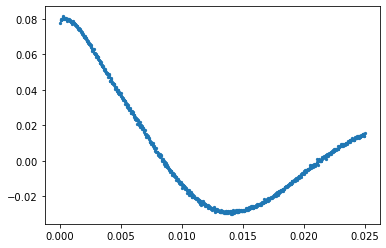

In [28]:
plt.scatter(mat["time"].reshape(-1), -mat["readout"].reshape(-1), s=5)
plt.show()

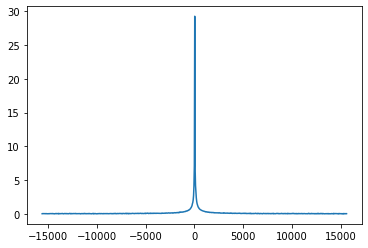

In [54]:
fs = 31.25e3

fft_time = fft.fftshift(fft.fftfreq(len(mat["readout"].reshape(-1)), d=1/fs))
readout_fft = fft.fftshift(fft.fft(mat["readout"].reshape(-1)))

plt.plot(fft_time, np.abs(readout_fft))
plt.show()

## Shimming

In [13]:
mat = loadmat("FID_best_shim.mat")
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'psd', 'readout', 'time', 'readout_ave'])

/opt/homebrew/Caskroom/miniforge/base/envs/imaging/lib/python3.9/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


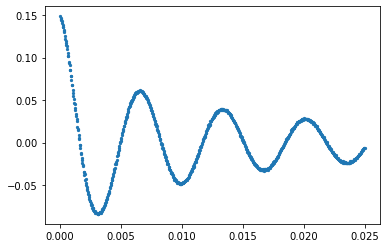

In [18]:
plt.scatter(mat["time"].reshape(-1), -mat["readout"].reshape(-1), s=5)
plt.show()

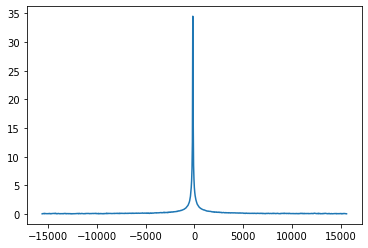

In [15]:
fs = 31.25e3

fft_time = fft.fftshift(fft.fftfreq(len(mat["readout"].reshape(-1)), d=1/fs))
readout_fft = fft.fftshift(fft.fft(mat["readout"].reshape(-1)))

plt.plot(fft_time, np.abs(readout_fft))
plt.show()

In [16]:
abs_readout_fft = np.abs(readout_fft)

S = np.max(abs_readout_fft)
noise = np.std(abs_readout_fft[abs_readout_fft < 0.1])
print(f"SNR = {S / noise}")
print(f"Area of the spectrum = {np.sum(abs_readout_fft)}")

SNR = 2368.736884644617
Area of the spectrum = 287.0634416093714


/opt/homebrew/Caskroom/miniforge/base/envs/imaging/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


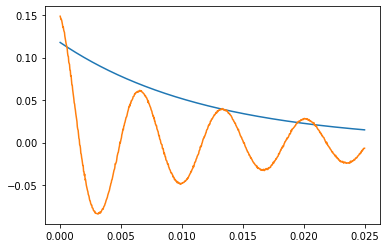

T2* = 0.012101683376528068


In [22]:
def func(x, a, c):
    return a * np.exp(- x / c)

x = mat["time"].reshape(-1)
y = mat["readout"].reshape(-1)

popt, pcov = curve_fit(func, x, np.abs(-y), p0=(0.15, 1e-3))
plt.plot(x, func(x, *popt))
plt.plot(x, -y)
plt.show()

print(f"T2* = {popt[1]}")

In [30]:
abs_readout_fft = np.abs(readout_fft)

S = np.max(abs_readout_fft)
noise = np.std(abs_readout_fft[abs_readout_fft < 0.1])
print(f"SNR = {S / noise}")
print(f"Area of the spectrum = {np.sum(abs_readout_fft)}")

SNR = 1400.2081646713252
Area of the spectrum = 146.9398644849889


/opt/homebrew/Caskroom/miniforge/base/envs/imaging/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


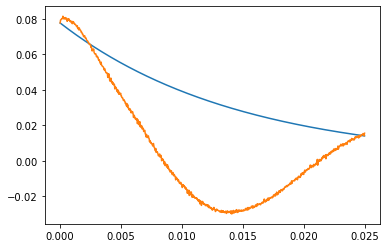

T2* = 0.014583521632842744


In [56]:
def func(x, a, c):
    return a * np.exp(- x / c)

x = mat["time"].reshape(-1)
y = mat["readout"].reshape(-1)

popt, pcov = curve_fit(func, x, np.abs(-y), p0=(0.15, 1e-3))
plt.plot(x, func(x, *popt))
plt.plot(x, -y)
plt.show()

print(f"T2* = {popt[1]}")

## Apodization

In [34]:
from scipy.signal import convolve
from scipy.signal.windows import boxcar, exponential 

S = 0.8857075916890619
noise = 0.27410366320331425
SNR = 3.2312869566872413


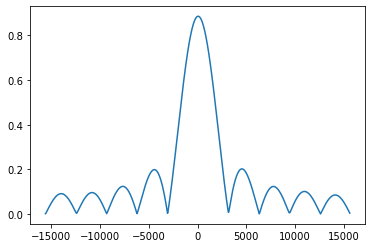

In [51]:
fs = 31.25e3

# y_ = convolve(-y, boxcar(10), mode="same")
box = np.zeros(len(y))
box[:10] = 1
y_ = -y * box

fft_time = fft.fftshift(fft.fftfreq(len(y_), d=1/fs))
readout_fft = fft.fftshift(fft.fft(y_))

S = np.max(np.abs(readout_fft))
noise = np.std(readout_fft[:-50])

print(f"S = {S}")
print(f"noise = {noise}")
print(f"SNR = {S / noise}")

plt.plot(fft_time, np.abs(readout_fft))
plt.show()

S = 8.254063564265074e-17
noise = 6.028195775992568e-17
SNR = 1.369242783576651


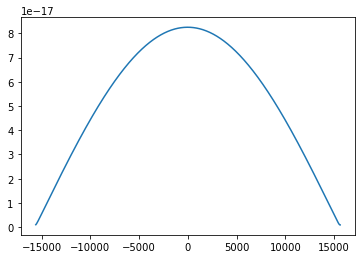

In [70]:
fs = 31.25e3

# box = np.zeros(len(y))
# box[:10] = 1
exp = exponential(len(y), tau=popt[1], sym=False)
y_ = -y * exp

fft_time = fft.fftshift(fft.fftfreq(len(y_), d=1/fs))
readout_fft = fft.fftshift(fft.fft(y_))

S = np.max(np.abs(readout_fft))
noise = np.std(readout_fft[:-50])

print(f"S = {S}")
print(f"noise = {noise}")
print(f"SNR = {S / noise}")

plt.plot(fft_time, np.abs(readout_fft))
plt.show()

TypeError: unsupported operand type(s) for /: 'Line2D' and 'complex'

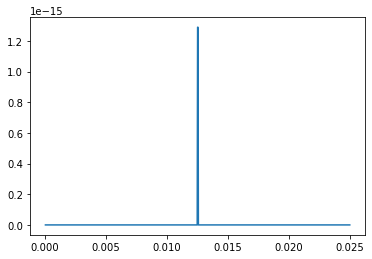

In [75]:
# plt.plot(x, -y)
plt.plot(x, exponential(len(y), tau=popt[1], sym=False))

In [69]:
exp

array([0.00000000e+000+0.00000000e+000j, 0.00000000e+000+0.00000000e+000j,
       0.00000000e+000+0.00000000e+000j, 0.00000000e+000+0.00000000e+000j,
       0.00000000e+000+0.00000000e+000j, 0.00000000e+000+0.00000000e+000j,
       0.00000000e+000+0.00000000e+000j, 0.00000000e+000+0.00000000e+000j,
       0.00000000e+000+0.00000000e+000j, 0.00000000e+000+0.00000000e+000j,
       0.00000000e+000+0.00000000e+000j, 0.00000000e+000+0.00000000e+000j,
       0.00000000e+000+0.00000000e+000j, 0.00000000e+000+0.00000000e+000j,
       0.00000000e+000+0.00000000e+000j, 0.00000000e+000+0.00000000e+000j,
       0.00000000e+000+0.00000000e+000j, 0.00000000e+000+0.00000000e+000j,
       0.00000000e+000+0.00000000e+000j, 0.00000000e+000+0.00000000e+000j,
       0.00000000e+000+0.00000000e+000j, 0.00000000e+000+0.00000000e+000j,
       0.00000000e+000+0.00000000e+000j, 0.00000000e+000+0.00000000e+000j,
       0.00000000e+000+0.00000000e+000j, 0.00000000e+000+0.00000000e+000j,
       0.00000000e+000+0.